In [3]:
# import zipfile
# import os
# from tqdm import tqdm

# zip_path = r"C:\Users\91920\Downloads\archive (11).zip"
# extract_path = r"C:\prabhakar\null classes\pythonProject1"

# # Ensure the extraction directory exists
# os.makedirs(extract_path, exist_ok=True)

# # Extract the ZIP file with a progress bar
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     # Get list of files in the zip
#     file_list = zip_ref.namelist()
    
#     # Create a tqdm progress bar
#     for file in tqdm(file_list, desc="Extracting files"):
#         zip_ref.extract(file, extract_path)

# print(f"Extracted to {extract_path}")


In [4]:
import os
for i in os.listdir("ASL_Dataset"):
    print(i)

Test
Train


In [5]:
data_class = []
for i in os.listdir("ASL_Dataset\Test"):
    print(i)
    data_class.append(i)
print(len(data_class))
print(data_class)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
Nothing
O
P
Q
R
S
Space
T
U
V
W
X
Y
Z
28
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [6]:
print(len(os.listdir("ASL_Dataset/Train")))

28


no of class :28
data_class =
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
train="ASL_Dataset\Test"
test = "ASL_Dataset\Test"



Important Libraires

In [18]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [19]:
# Directories
train_dir = "ASL_Dataset/Train"
test_dir = "ASL_Dataset/Test"

# Class labels
data_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 
              'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Image properties
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32


In [20]:
# Image Augmentation for the training dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20,
    fill_mode='nearest',
    validation_split=0.2  # Split train into train and validation
)



# Preprocessing for the test dataset (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and augment the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Load validation data from the training set
validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Load the test data
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for testing
)


Found 132542 images belonging to 28 classes.
Found 33128 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


In [27]:
model = tf.keras.models.Sequential([
    # First Convolutional Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Third Convolutional Block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Fourth Convolutional Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten and Fully Connected Layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(28, activation='softmax')  # 28 output classes
])

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 128)      512       
 hNormalization)                                                 
                                                      

In [28]:
# Import necessary callback functions
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the callbacks
checkpoint_cb = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping_cb = EarlyStopping(patience=8, restore_best_weights=True, monitor='val_loss', mode='min')
reduce_lr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Combine the callbacks into a list
callbacks = [checkpoint_cb, early_stopping_cb, reduce_lr_cb]

# Training the model with callbacks
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=25,
    steps_per_epoch=train_data.samples // BATCH_SIZE,
    validation_steps=validation_data.samples // BATCH_SIZE,
    callbacks=callbacks  # Adding callbacks here
)


Epoch 1/25
4141/4141 [==============================] - 447s 108ms/step - loss: 1.0560 - accuracy: 0.6678 - val_loss: 0.6220 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 2/25
4141/4141 [==============================] - 469s 113ms/step - loss: 0.2893 - accuracy: 0.9198 - val_loss: 0.3860 - val_accuracy: 0.8876 - lr: 0.0010
Epoch 3/25
4141/4141 [==============================] - 422s 102ms/step - loss: 0.2312 - accuracy: 0.9411 - val_loss: 2.0588 - val_accuracy: 0.6119 - lr: 0.0010
Epoch 4/25
 606/4141 [===>..........................] - ETA: 4:30 - loss: 0.1891 - accuracy: 0.9506

KeyboardInterrupt: 

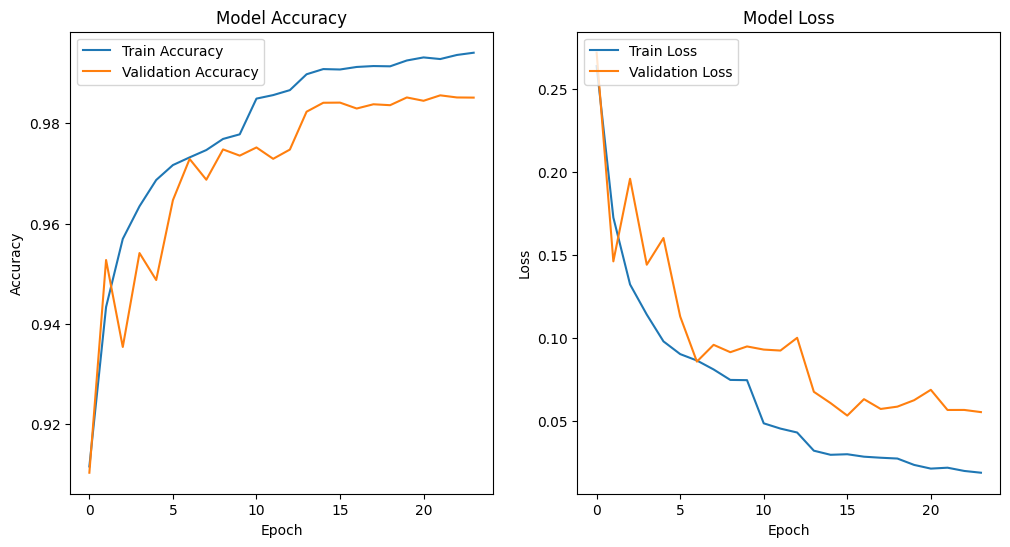

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call the function to plot the graphs
plot_training_history(history)


4/4 [==============================] - 0s 44ms/step - loss: 5.9376e-06 - accuracy: 1.0000
Test accuracy: 1.0
4/4 [==============================] - 0s 36ms/step
Classification Report
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       1.00      1.00      1.00         4
           C       1.00      1.00      1.00         4
           D       1.00      1.00      1.00         4
           E       1.00      1.00      1.00         4
           F       1.00      1.00      1.00         4
           G       1.00      1.00      1.00         4
           H       1.00      1.00      1.00         4
           I       1.00      1.00      1.00         4
           J       1.00      1.00      1.00         4
           K       1.00      1.00      1.00         4
           L       1.00      1.00      1.00         4
           M       1.00      1.00      1.00         4
           N       1.00      1.00      1.00         4
     N

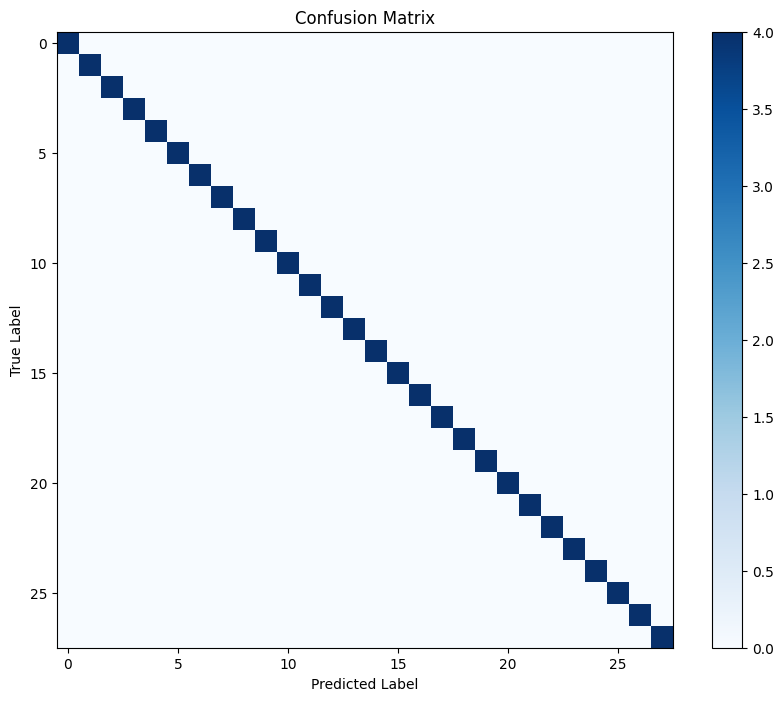

In [25]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

# Classification report and confusion matrix
test_data.reset()  # Reset the test data iterator
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=data_class))

# Confusion Matrix
confusion_mtx = confusion_matrix(test_data.classes, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(confusion_mtx, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()
plt.show()


In [26]:
import tkinter as tk
from tkinter import filedialog, Label, Button
import cv2
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('best_model.h5')

# Class labels
data_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 
              'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Image properties
IMG_HEIGHT = 64
IMG_WIDTH = 64

# Function to preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH))  # Resize to match model's expected input size
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Prediction function
def predict_class(img_path):
    processed_img = preprocess_image(img_path)
    prediction = model.predict(processed_img)
    predicted_class_index = np.argmax(prediction)  # Get the index of the highest predicted probability
    predicted_class = data_class[predicted_class_index]
    return predicted_class

# Function to handle image upload and prediction
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, (250, 250))  # Resize for display
        img_display = ImageTk.PhotoImage(image=Image.fromarray(img_resized))

        panel = Label(root, image=img_display)
        panel.image = img_display  # Keep a reference to avoid garbage collection
        panel.grid(row=1, column=0, padx=10, pady=10)

        predicted_class = predict_class(file_path)
        prediction_label.config(text=f'Predicted Sign: {predicted_class}')

# GUI Setup
root = tk.Tk()
root.title("Sign Language Detection")

# Upload Button
upload_button = Button(root, text="Upload Image", command=upload_image)
upload_button.grid(row=0, column=0, padx=10, pady=10)

# Prediction Label
prediction_label = Label(root, text="Predicted Sign: None")
prediction_label.grid(row=2, column=0, padx=10, pady=10)

# Start the GUI loop
root.mainloop()


1/1 [==============================] - 0s 18ms/step
